# Customer Churn Analysis

In [1]:

# Customer Churn Analysis

# ========================================
# 1. Kaggle API Setup & Dataset Download
# ========================================
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d yeanzc/telco-customer-churn-ibm-dataset
!unzip "*.zip"






Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/yeanzc/telco-customer-churn-ibm-dataset
License(s): other
  0% 0.00/1.25M [00:00<?, ?B/s]
100% 1.25M/1.25M [00:00<00:00, 575MB/s]
Archive:  telco-customer-churn-ibm-dataset.zip
  inflating: Telco_customer_churn.xlsx  


In [2]:
# ========================================
# 2. Import Libraries
# ========================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt




In [3]:
# ========================================
# 3. Load Dataset
# ========================================
data = pd.read_excel("/content/Telco_customer_churn.xlsx")
print("Columns in dataset:", data.columns)
data.head()


Columns in dataset: Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [4]:


# ========================================
# 4. Data Cleaning
# ========================================
data = data.drop(columns=["CustomerID","Count","Country","State"])
data['Total Charges'] = pd.to_numeric(data['Total Charges'], errors="coerce")
data = data.dropna(subset=["Total Charges"])
data = data.drop_duplicates()
print("Final shape after cleaning:", data.shape)




Final shape after cleaning: (7032, 29)


Overall Churn Rate: 26.58%


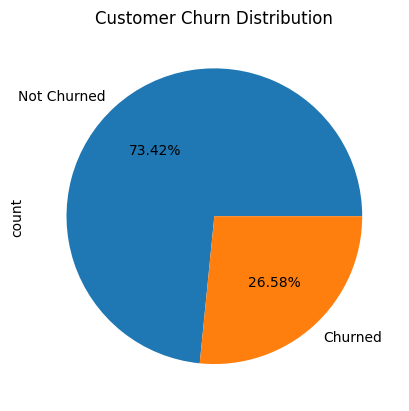

In [6]:
# ========================================
# 5. Overall Churn Rate
# ========================================
total = data['Churn Value'].value_counts().sum()
churn = data['Churn Value'].sum()
print(f"Overall Churn Rate: {(churn/total)*100:.2f}%")

data['Churn Value'].value_counts().plot(
    kind="pie", autopct="%1.2f%%",
    labels=["Not Churned", "Churned"],
    title="Customer Churn Distribution"
)
plt.show()




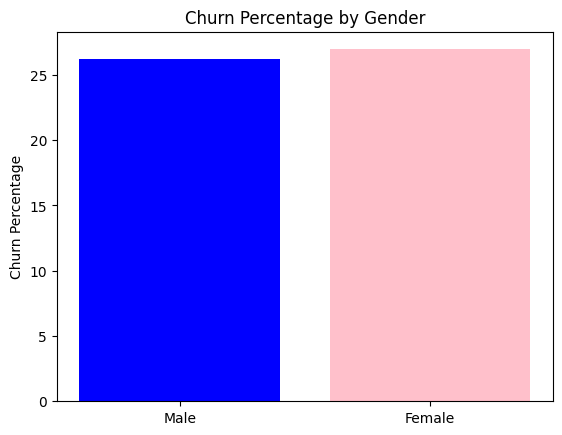

In [8]:
# ========================================
# 6. Churn by Gender
# ========================================
t_male, t_female = data['Gender'].value_counts()
churn_male = data[(data['Gender']=="Male") & (data['Churn Value']==1)].shape[0]
churn_female = data[(data['Gender']=="Female") & (data['Churn Value']==1)].shape[0]

plt.bar(["Male","Female"],
        [(churn_male/t_male)*100, (churn_female/t_female)*100],
        color=["blue","pink"])
plt.ylabel('Churn Percentage')
plt.title('Churn Percentage by Gender')
plt.show()






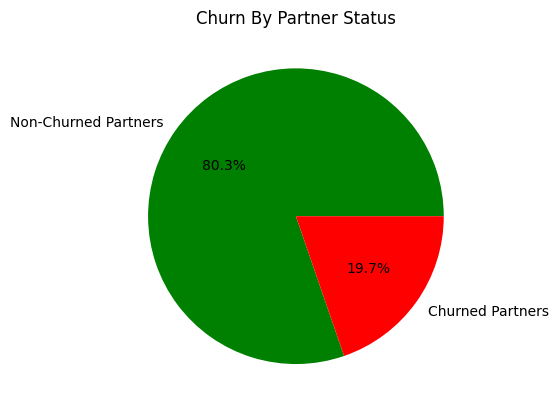

In [10]:
# ========================================
# 7. Churn by Partner Status
# ========================================
p_churn = data[(data['Partner']=="Yes") & (data['Churn Value']==1)].shape[0]
total_p = (data['Partner']=="Yes").sum()

plt.pie([total_p - p_churn, p_churn],
        colors=["green","red"],
        labels=["Non-Churned Partners","Churned Partners"],
        autopct="%1.1f%%")
plt.title("Churn By Partner Status")
plt.show()




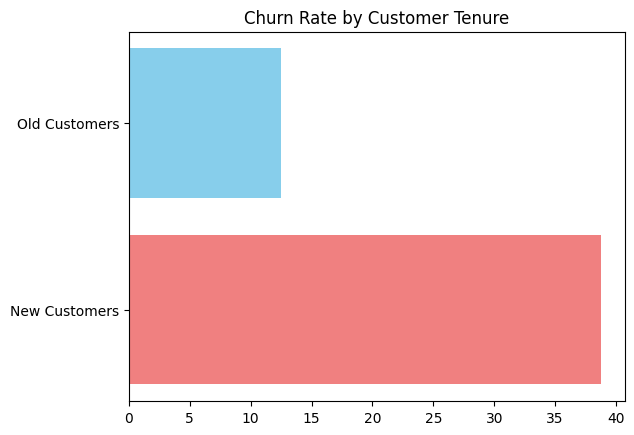

In [11]:

# ========================================
# 8. Churn by Tenure
# ========================================
avg_tenure = data['Tenure Months'].mean()
new_c = data[(data['Churn Value']==1) & (data['Tenure Months']<avg_tenure)].shape[0]
t_new = (data['Tenure Months']<avg_tenure).sum()

old_c = data[(data['Churn Value']==1) & (data['Tenure Months']>avg_tenure)].shape[0]
t_old = (data['Tenure Months']>avg_tenure).sum()

plt.barh(["New Customers","Old Customers"],
         [(new_c/t_new)*100, (old_c/t_old)*100],
         color=["lightcoral","skyblue"])
plt.title("Churn Rate by Customer Tenure")
plt.show()



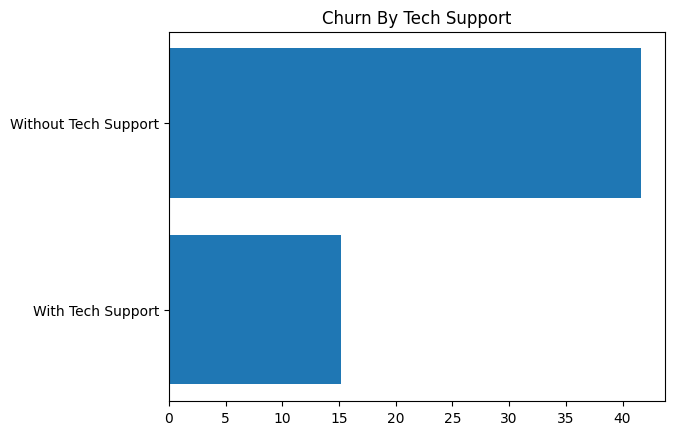

In [12]:
# ========================================
# 9. Churn by Tech Support
# ========================================
supp_c = data[(data['Tech Support']=="Yes") & (data['Churn Value']==1)].shape[0]
t_supp = (data['Tech Support']=="Yes").sum()

n_supp_c = data[(data['Tech Support']=="No") & (data['Churn Value']==1)].shape[0]
t_n_supp = (data['Tech Support']=="No").sum()

plt.barh(["With Tech Support","Without Tech Support"],
         [(supp_c/t_supp)*100, (n_supp_c/t_n_supp)*100])
plt.title("Churn By Tech Support")
plt.show()
